In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import xgboost as xgb

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Load Wine Dataset 

In [2]:
X, y = load_wine(return_X_y=True)

# X for features and y for variable we want to predict

In [3]:
features = [
    'alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
    'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
    'proanthocyanins', 'color_intensity', 'hue',
    'od280/od315_of_diluted_wines', 'proline'
]

X = pd.DataFrame(data=X, columns=features)
y = pd.DataFrame(data=y, columns=['classes'])
X.head()
y.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


,classes
0,0
1,0
2,0
3,0
4,0


# Classes distribution

((178, 13), (178, 1))

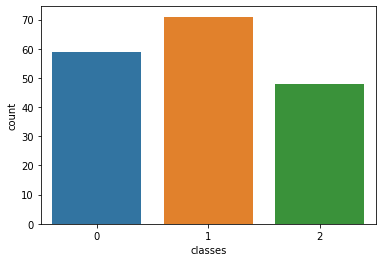

In [4]:
X.shape, y.shape

_ = sns.countplot(y.classes)

# Train/Test Split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

X_train.shape, y_train.shape, X_test.shape, y_test.shape, 

((133, 13), (133, 1), (45, 13), (45, 1))

In [6]:
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test)

In [7]:
params = {
    'max_depth': 6,
    'objective': 'multi:softmax',  # error evaluation for multiclass training
    'num_class': 3,
    # Set number of GPUs if available   
    'n_gpus': 0
}

# Fit the model

In [8]:
bst = xgb.train(params, dtrain)

# Predict unseen data 

In [9]:
pred = bst.predict(dtest)

In [10]:
pred

array([0., 1., 0., 0., 1., 0., 0., 1., 1., 2., 1., 1., 2., 2., 0., 0., 1.,
       0., 0., 2., 2., 2., 0., 0., 1., 1., 0., 1., 0., 1., 0., 2., 1., 2.,
       2., 1., 0., 2., 2., 1., 2., 1., 0., 1., 1.], dtype=float32)

# Model report

In [11]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       1.00      0.94      0.97        18
           2       1.00      1.00      1.00        12

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [12]:
cm = confusion_matrix(y_test, pred)
cm

array([[15,  0,  0],
       [ 1, 17,  0],
       [ 0,  0, 12]])

# Confusion Matrix

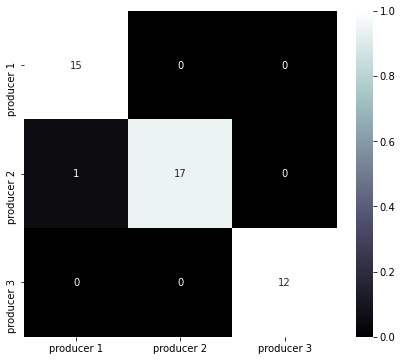

In [13]:
def plot_confusion_matrix(cm, classes, normalized=True, cmap='bone'):
    plt.figure(figsize=[7, 6])
    norm_cm = cm
    if normalized:
        norm_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        sns.heatmap(norm_cm, annot=cm, fmt='g', xticklabels=classes, yticklabels=classes, cmap=cmap)

plot_confusion_matrix(cm, ['producer 1', 'producer 2', 'producer 3'])